# Давайте вспомним, что было в прошлые разы

In [1]:
a = 5
b = 9
c = 'капбара'

In [2]:
#Какой тип у a?
type(a)

int

In [3]:
#Создвйте список с отдельными буквами из с
l = []
for i in c:
    l.append(i)
l    

['к', 'а', 'п', 'б', 'а', 'р', 'а']

In [4]:
#Если буква гласная, то напишите об этом
import re
l = []
for i in c:
    if re.match('[аАиИыЫуУоО]{1}', i):
        print('Гласная!')
    l.append(i)
l

Гласная!
Гласная!
Гласная!


['к', 'а', 'п', 'б', 'а', 'р', 'а']

In [5]:
#Напишите функцию, которая принимает на вход строку, разбирает ее на буквы, и делает из них список
def hi(name):
    print('Hi, {name}!'.format(name = name))

hi('капибара')

Hi, капибара!


In [6]:
input_string = 'kjfdklfjkjf'
input_string[1]

'j'

In [7]:
input_string

'kjfdklfjkjf'

# Pandas

In [8]:
import pandas as pd
import numpy as np

## Series & Dataframes

In [9]:
my_series = pd.Series([1, 3, 5, np.nan, 6, 8])
my_series

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
my_df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
my_df

,A,B,C,D
2013-01-01,-0.808732,-0.211076,-0.182451,-1.332156
2013-01-02,0.513726,0.367232,-0.821769,-0.161349
2013-01-03,1.531370,-0.109882,0.303892,-0.042265
2013-01-04,-0.181672,-1.355179,0.207016,1.516006
2013-01-05,-0.344674,-0.265485,-2.341380,-0.229861
2013-01-06,-0.771320,-1.075839,0.823132,0.093223


In [12]:
my_df2 = pd.DataFrame({'A': 1., 
                       'B': pd.Timestamp('20130102'),
                       'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                       'D': np.array([3] * 4, dtype='int32'),
                       'E': pd.Categorical(["test", "train", "test", "train"]),
                       'F': 'foo'})
my_df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
my_df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Inside

In [14]:
my_df.head()

,A,B,C,D
2013-01-01,-0.808732,-0.211076,-0.182451,-1.332156
2013-01-02,0.513726,0.367232,-0.821769,-0.161349
2013-01-03,1.531370,-0.109882,0.303892,-0.042265
2013-01-04,-0.181672,-1.355179,0.207016,1.516006
2013-01-05,-0.344674,-0.265485,-2.341380,-0.229861


In [15]:
my_df.tail(3)

,A,B,C,D
2013-01-04,-0.181672,-1.355179,0.207016,1.516006
2013-01-05,-0.344674,-0.265485,-2.341380,-0.229861
2013-01-06,-0.771320,-1.075839,0.823132,0.093223


In [16]:
my_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
my_df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
my_df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.010217,-0.441705,-0.335260,-0.026067
std,0.895452,0.645800,1.125079,0.911941
min,-0.808732,-1.355179,-2.341380,-1.332156
25%,-0.664658,-0.873250,-0.661940,-0.212733
50%,-0.263173,-0.238280,0.012283,-0.101807
75%,0.339877,-0.135181,0.279673,0.059351
max,1.531370,0.367232,0.823132,1.516006


## Data Manipulation

In [19]:
!pip install seaborn

     |████████████████████████████████| 225kB 1.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

Seaborn позволяет загружать некоторые подготовленные датасеты, которые удобно использовать в качестве примеров. 

Это вот информация о пассажирах Титаника (https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv )

In [21]:
titanic = sns.load_dataset('titanic')

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


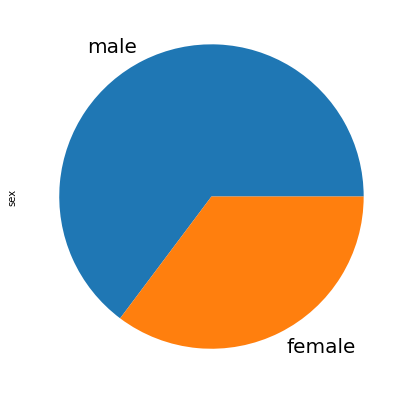

In [23]:
titanic['sex'].value_counts().plot(kind='pie', figsize=(7, 7), fontsize=20);

<AxesSubplot:ylabel='pclass'>

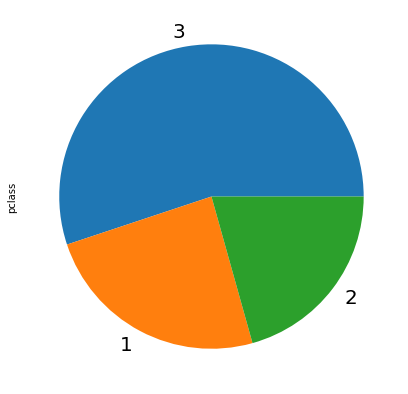

In [24]:
titanic['pclass'].value_counts().plot(kind='pie', figsize=(7, 7), fontsize=20)

In [25]:
titanic[
    (titanic.sex == 'female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


In [26]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(titanic.age, bins, labels=labels)
titanic['age_group'] = age_groups

In [27]:
groups = titanic.groupby(['age_group', 'alone'])

In [28]:
groups.size()

age_group  alone
child      False     67
           True       2
teenager   False     23
           True      21
adult      False    216
           True     363
elder      False      4
           True      18
dtype: int64

In [29]:
100 * groups.size() / len(titanic)

age_group  alone
child      False     7.519641
           True      0.224467
teenager   False     2.581369
           True      2.356902
adult      False    24.242424
           True     40.740741
elder      False     0.448934
           True      2.020202
dtype: float64

In [30]:
def is_old_func(row):
    return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

In [31]:
titanic['is_old'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_old, dtype: bool

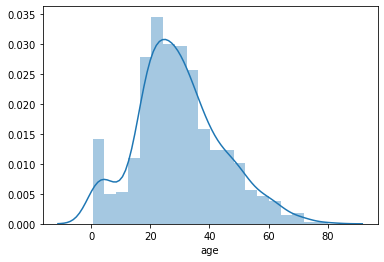

In [32]:
sns.distplot(titanic.age.dropna())
plt.show()

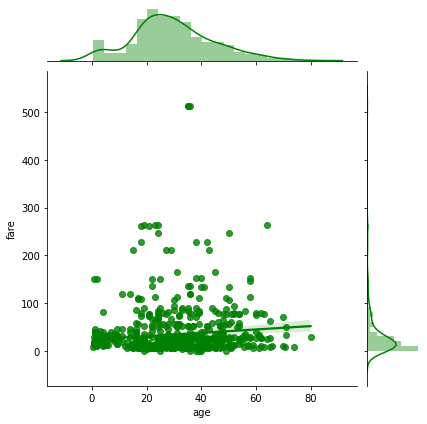

In [33]:
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')
plt.show()

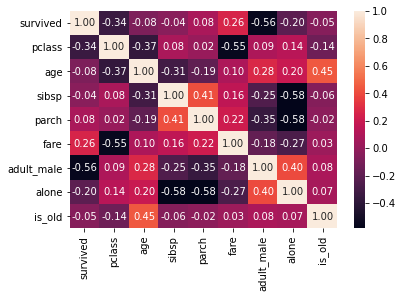

In [34]:
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()

# Визуализации

In [35]:
import pandas as pd

import seaborn as sns
%matplotlib inline

Датасет с данными о полетах доступен тут:
https://github.com/mwaskom/seaborn-data/blob/master/flights.csv 

In [36]:
flights  =  sns.load_dataset('flights')

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<AxesSubplot:>

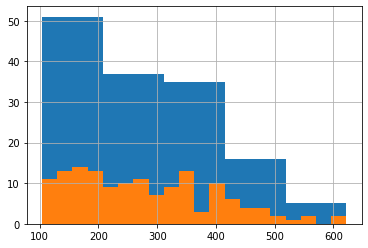

In [37]:
flights.passengers.hist(bins=5) # The blue bars
flights.passengers.hist(bins=20) # The orange bars

In [38]:
flights.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

Эти данные можно визуализировать. boxplot покажет
* минимум и максимум 
* диапазон значений(25 - 75 перцентили) 
* медиана

<AxesSubplot:xlabel='passengers'>

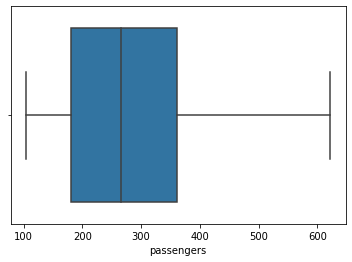

In [39]:
sns.boxplot(x=flights.passengers)

Вернемся к данным о пассажирах Титаника (https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv )

In [40]:
titanic = sns.load_dataset('titanic') 
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

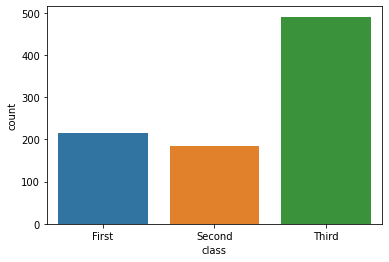

In [41]:
sns.countplot(titanic['class'])

Другой известный датасет - fuel economy data (https://www.fueleconomy.gov/feg/download.shtml , https://www.kaggle.com/uciml/autompg-dataset) доступен тут - https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

In [42]:
mpg  =  sns.load_dataset('mpg')

In [43]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


Диаграмма рассеяния будет выглядеть так:

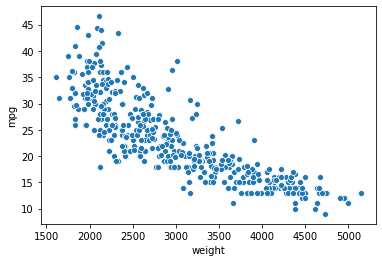

In [45]:
mpg = sns.load_dataset('mpg')

g = sns.scatterplot(data=mpg, x='weight', y='mpg')

jointplot - гибрид scatterplot и гистограммы

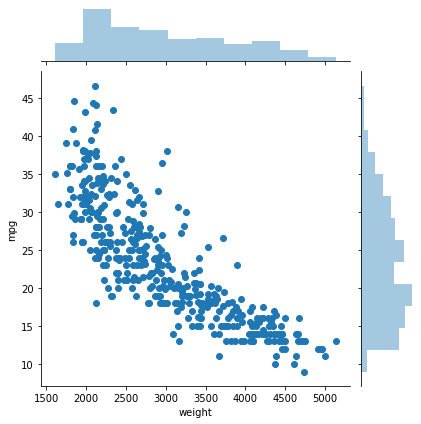

In [46]:
sns.jointplot(data=mpg, x='weight', y='mpg')

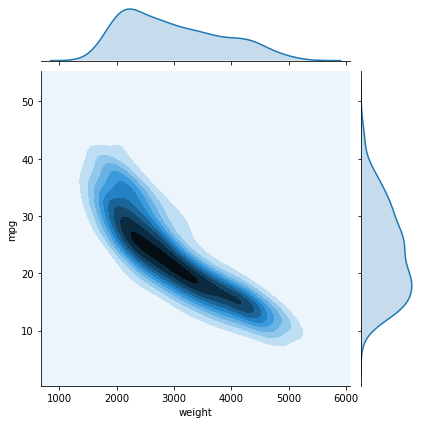

In [47]:
sns.jointplot(data=mpg, x='weight', y='mpg', kind='kde')

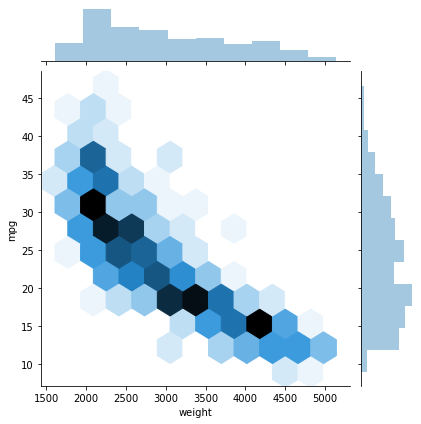

In [48]:
sns.jointplot(data=mpg, x='weight', y='mpg', kind='hex')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

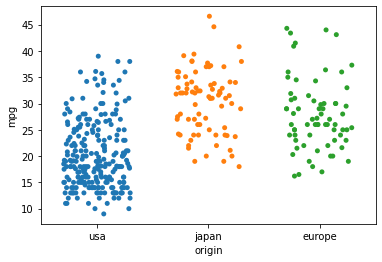

In [49]:
sns.stripplot(data=mpg, x='origin', y='mpg', jitter=0.3)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

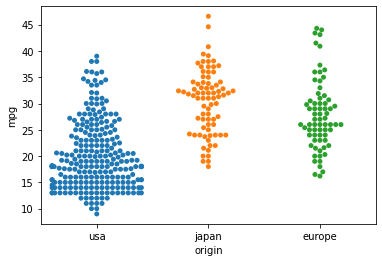

In [50]:
sns.swarmplot(data=mpg, x='origin', y='mpg')

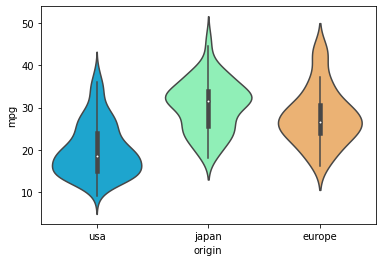

In [51]:
sns.violinplot(x="origin", y="mpg", data=mpg, palette='rainbow');

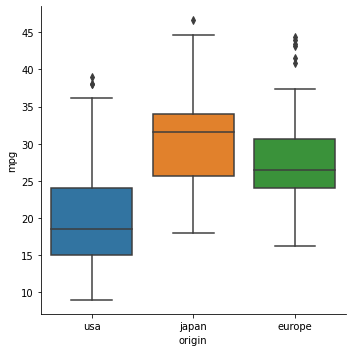

In [52]:
sns.catplot(data=mpg, x='origin', y='mpg', kind='box')

In [53]:
titanic = sns.load_dataset('titanic')

titanic.head(3)

sex_class = pd.crosstab(titanic.sex, titanic['class'])

sex_class

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [54]:
sex_class_normed = pd.crosstab(titanic.sex, titanic['class'], normalize=True) * 100
sex_class_normed

class,First,Second,Third
sex,,,
female,10.549944,8.529742,16.161616
male,13.692480,12.121212,38.945006


<AxesSubplot:xlabel='class', ylabel='sex'>

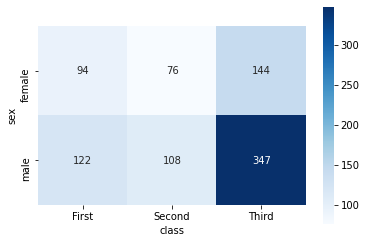

In [55]:
sns.heatmap(sex_class, cmap='Blues', square=True, annot=True, fmt='g')

/Users/madhape/envs/py3-some-basic-ipnbs/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


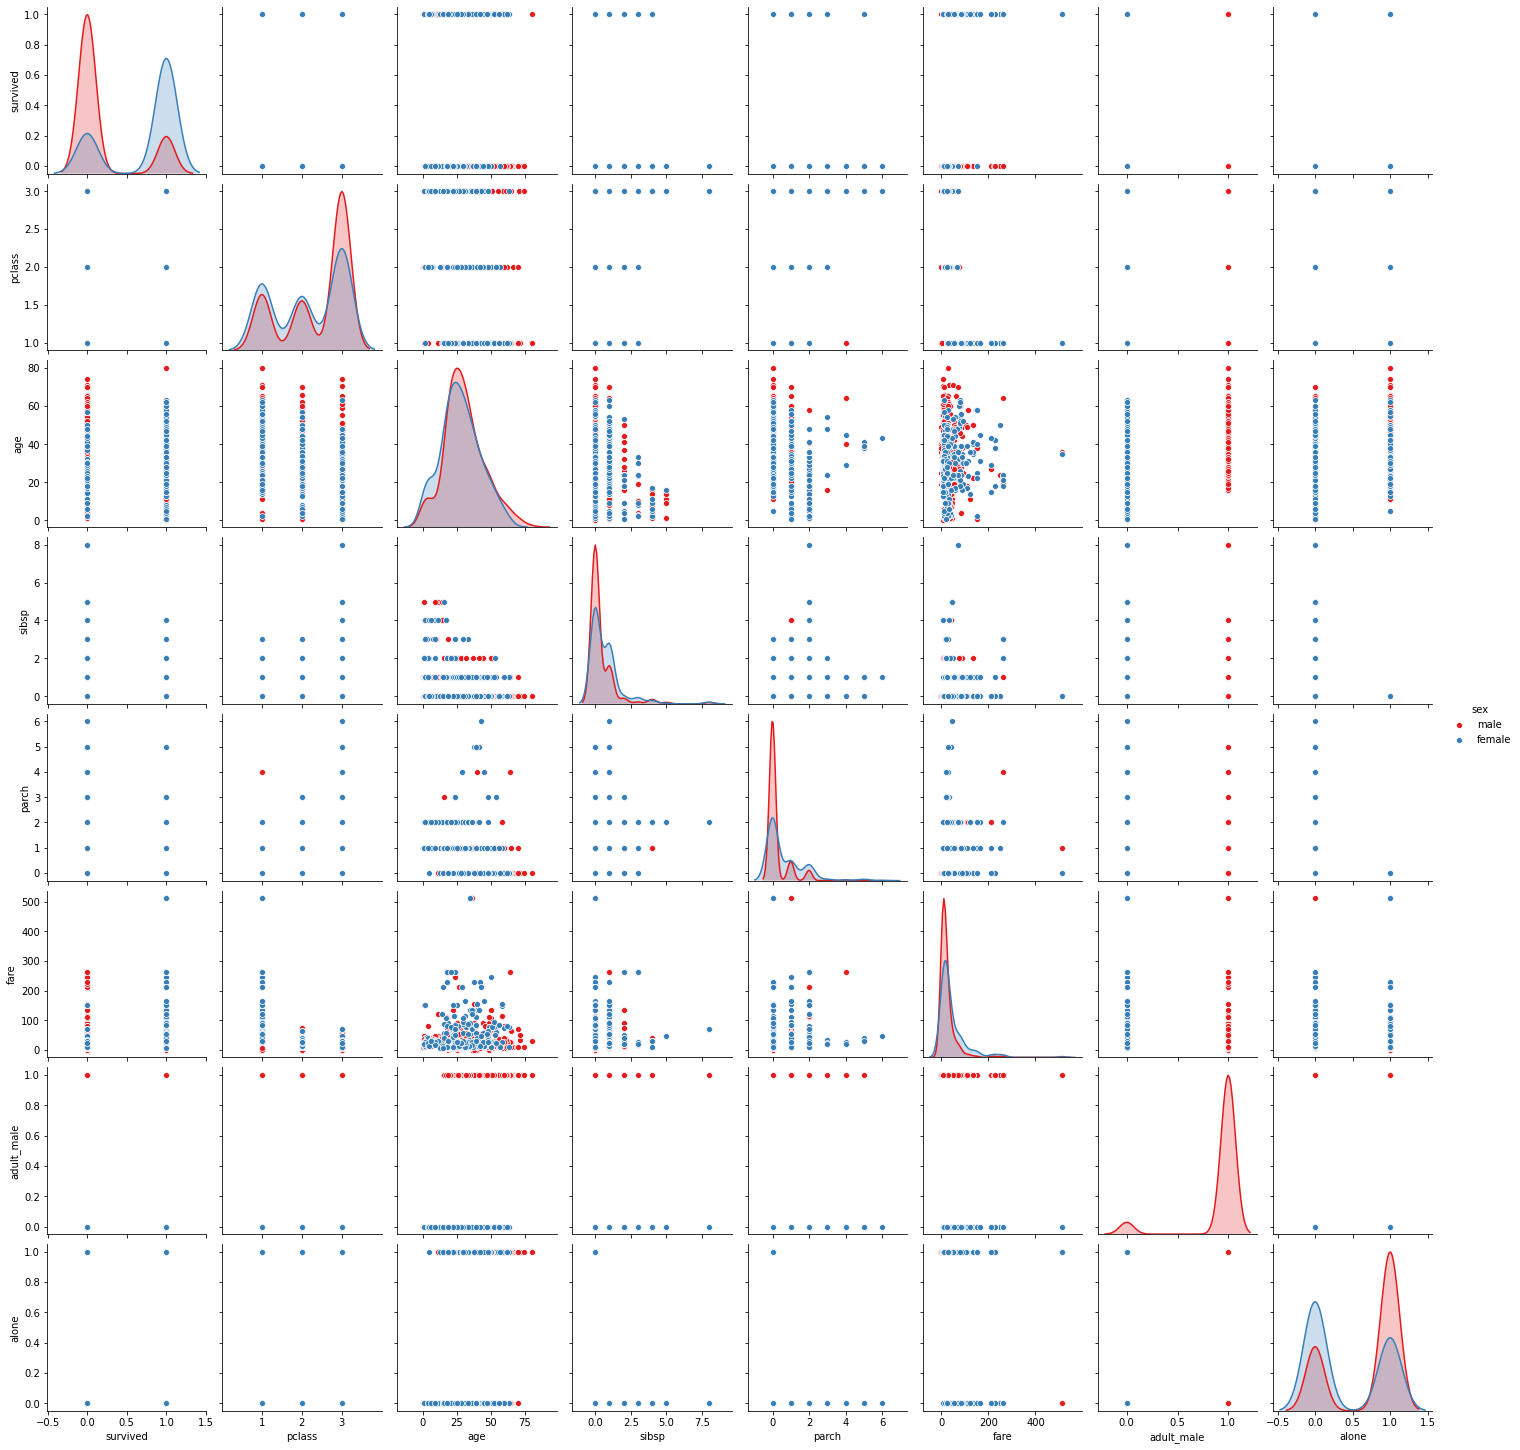

In [56]:
sns.pairplot(titanic, hue='sex', palette='Set1')